                                   Project: Predicting diabetes outcome for women
Introduction:

This dataset, originally sourced from a Taipei Municipal medical center, aims to determine whether a person has diabetes based on various health metrics. It consists of 9 columns, with one of them serving as the target variable for predicting diabetes.The dataset includes features such as the number of pregnancies, plasma glucose level, diastolic blood pressure, and more.

Here's a deeper look into each variable and its potential impact on diabetes risk:

1. Pregnancies:

The number of pregnancies can provide insights into gestational diabetes (GDM), which increases the risk of type 2 diabetes later in life. GDM occurs when the body cannot use insulin effectively during pregnancy, causing glucose to build up in the blood.

2. Glucose:

Plasma glucose concentration after a 2-hour oral glucose tolerance test (OGTT) is crucial for diabetes diagnosis.

Interpretation:
Normal: Plasma glucose level <100 mg/dL 
Prediabetes : Plasma glucose level between 100-125 mg/dL.
Diabetes: Plasma glucose level ≥ 126 mg/dL.

3. Blood Pressure (Diastolic):

High blood pressure is often linked to poor metabolic health.

Classification:
Low: <60 mm Hg
Normal: 60-79 mm Hg
Prehypertension: 80-89 mm Hg
Hypertension: 90-120 mm Hg
Hypertensive Crisis: ≥120 mm Hg

Impact: High blood pressure increases the risk of developing type 2 diabetes, especially when paired with other risk factors like obesity or high cholesterol.

4. Skin Thickness (Triceps Skinfold Thickness):

Impact: A higher skinfold thickness suggests increased body fat, which is often associated with a higher likelihood of diabetes.

5. Insulin:

Classification:
Normal: Below 140 mu U/ml
Prediabetes: 140-199 mu U/ml
Diabetes: ≥200 mu U/ml

Impact: Elevated insulin levels indicate insulin resistance, which is strongly linked to the development of type 2 diabetes.

6. BMI (Body Mass Index):

Domain Insight: BMI is a widely used indicator of body fat, and obesity is one of the strongest risk factors for type 2 diabetes.

Classification:
Underweight: BMI < 18.5
Healthy Weight: BMI 18.5 - 24.9
Overweight: BMI 25.0 - 29.9
Obese: BMI ≥ 30.0

Impact: Higher BMI, especially above 30, is a major risk factor for diabetes due to its impact on insulin sensitivity and glucose metabolism.

7. Diabetes Pedigree Function:

This variable measures the genetic predisposition to diabetes based on family history.

Impact: A higher pedigree score indicates a stronger genetic risk for diabetes, meaning that individuals with a family history of diabetes are more likely to develop the condition.

8. Age:

Age is a significant factor in the risk of developing diabetes. The likelihood of developing type 2 diabetes increases with age, particularly after 40.

Using the dataset, we shall see the effects that these factors might have




In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Importing Data
df = pd.read_csv("TAIPEI_diabetes.csv",sep=",")

In [4]:
#Data Exploration
df.head(10)

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0
5,1619297,0,82,92,9,253,19.724160,0.103424,26,0
6,1660149,0,133,47,19,227,21.941357,0.174160,21,0
7,1458769,0,67,87,43,36,18.277723,0.236165,26,0
8,1201647,8,80,95,33,24,26.624929,0.443947,53,1
9,1403912,1,72,31,40,42,36.889576,0.103944,26,0


In [1033]:
df.tail(10)

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
14990,1220763,5,169,83,31,60,49.004793,0.187397,53,1
14991,1603490,0,114,53,34,40,44.760534,0.143487,23,0
14992,1202654,3,48,60,24,81,29.417154,0.159605,42,1
14993,1165919,1,128,59,21,182,19.766514,0.167280,53,0
14994,1453189,0,72,99,32,32,20.932808,0.545038,22,0
14995,1490300,10,65,60,46,177,33.512468,0.148327,41,1
14996,1744410,2,73,66,27,168,30.132636,0.862252,38,1
14997,1742742,0,93,89,43,57,18.690683,0.427049,24,0
14998,1099353,0,132,98,18,161,19.791645,0.302257,23,0
14999,1386396,3,114,65,47,512,36.215437,0.147363,34,1


In [1034]:
df.describe()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.502922e+06,3.224533,107.856867,71.220667,28.814000,137.852133,31.509646,0.398968,30.137733,0.333333
std,2.892534e+05,3.391020,31.981975,16.758716,14.555716,133.068252,9.759000,0.377944,12.089703,0.471420
min,1.000038e+06,0.000000,44.000000,24.000000,7.000000,14.000000,18.200512,0.078044,21.000000,0.000000
25%,1.252866e+06,0.000000,84.000000,58.000000,15.000000,39.000000,21.259887,0.137743,22.000000,0.000000
50%,1.505508e+06,2.000000,104.000000,72.000000,31.000000,83.000000,31.767940,0.200297,24.000000,0.000000
75%,1.755205e+06,6.000000,129.000000,85.000000,41.000000,195.000000,39.259692,0.616285,35.000000,1.000000
max,1.999997e+06,14.000000,192.000000,117.000000,93.000000,799.000000,56.034628,2.301594,77.000000,1.000000


In [1035]:
df[['Pregnancies', 'PlasmaGlucose',	'DiastolicBloodPressure',	'TricepsThickness',	'SerumInsulin',	'BMI',	'DiabetesPedigree','Age']].describe()


,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,3.224533,107.856867,71.220667,28.814000,137.852133,31.509646,0.398968,30.137733
std,3.391020,31.981975,16.758716,14.555716,133.068252,9.759000,0.377944,12.089703
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200512,0.078044,21.000000
25%,0.000000,84.000000,58.000000,15.000000,39.000000,21.259887,0.137743,22.000000
50%,2.000000,104.000000,72.000000,31.000000,83.000000,31.767940,0.200297,24.000000
75%,6.000000,129.000000,85.000000,41.000000,195.000000,39.259692,0.616285,35.000000
max,14.000000,192.000000,117.000000,93.000000,799.000000,56.034628,2.301594,77.000000


In [1036]:
df.info()  # Check column names, data types, and non-null counts
df.describe()  # Summary statistics for numerical variables


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               15000 non-null  int64  
 1   Pregnancies             15000 non-null  int64  
 2   PlasmaGlucose           15000 non-null  int64  
 3   DiastolicBloodPressure  15000 non-null  int64  
 4   TricepsThickness        15000 non-null  int64  
 5   SerumInsulin            15000 non-null  int64  
 6   BMI                     15000 non-null  float64
 7   DiabetesPedigree        15000 non-null  float64
 8   Age                     15000 non-null  int64  
 9   Diabetic                15000 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 1.1 MB


,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.502922e+06,3.224533,107.856867,71.220667,28.814000,137.852133,31.509646,0.398968,30.137733,0.333333
std,2.892534e+05,3.391020,31.981975,16.758716,14.555716,133.068252,9.759000,0.377944,12.089703,0.471420
min,1.000038e+06,0.000000,44.000000,24.000000,7.000000,14.000000,18.200512,0.078044,21.000000,0.000000
25%,1.252866e+06,0.000000,84.000000,58.000000,15.000000,39.000000,21.259887,0.137743,22.000000,0.000000
50%,1.505508e+06,2.000000,104.000000,72.000000,31.000000,83.000000,31.767940,0.200297,24.000000,0.000000
75%,1.755205e+06,6.000000,129.000000,85.000000,41.000000,195.000000,39.259692,0.616285,35.000000,1.000000
max,1.999997e+06,14.000000,192.000000,117.000000,93.000000,799.000000,56.034628,2.301594,77.000000,1.000000


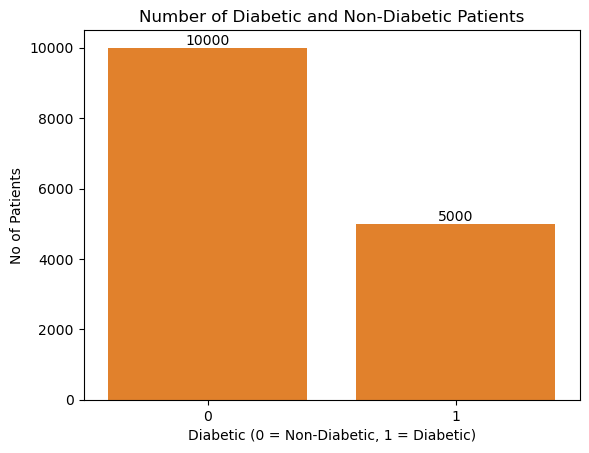

In [1037]:
 #Create the count plot
ax = sns.countplot(data=df, x='Diabetic')  # Replace `df` with your DataFrame

# Add numbers on top of the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d')  # Show integers on the bars


sns.countplot(data=df, x='Diabetic')
plt.title('Number of Diabetic and Non-Diabetic Patients')
plt.xlabel('Diabetic (0 = Non-Diabetic, 1 = Diabetic)')
plt.ylabel('No of Patients')
plt.show()


# from the data set we already have more non-diabetic patients this means our model could end up being biased towards non-diabetic diagnosis
# maybe when we split the data for training we may need to somehow consider representaion? 

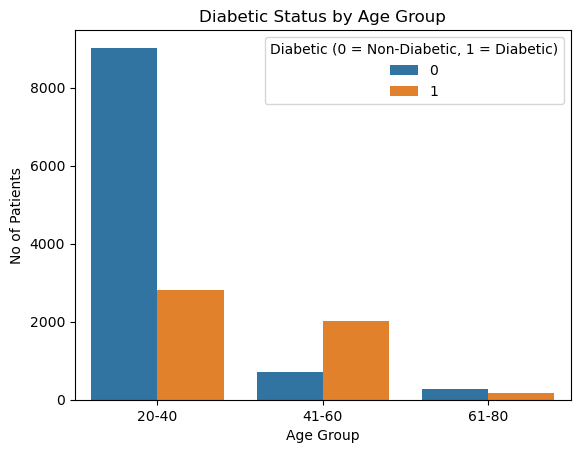

In [1039]:
# Create age bins
bins = [20, 40, 60, 80]  # Define age ranges
labels = ['20-40', '41-60', '61-80']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Plot the count plot with hue
sns.countplot(data=df, x='AgeGroup', hue='Diabetic')
plt.title('Diabetic Status by Age Group')
plt.xlabel('Age Group')
plt.ylabel('No of Patients')
plt.legend(title='Diabetic (0 = Non-Diabetic, 1 = Diabetic)')
plt.show()


# Women above 40 are more prevelent to type II diabetics and we see that in the data
# discrepency in the 60+ age group could be due to the less data being available in that age group

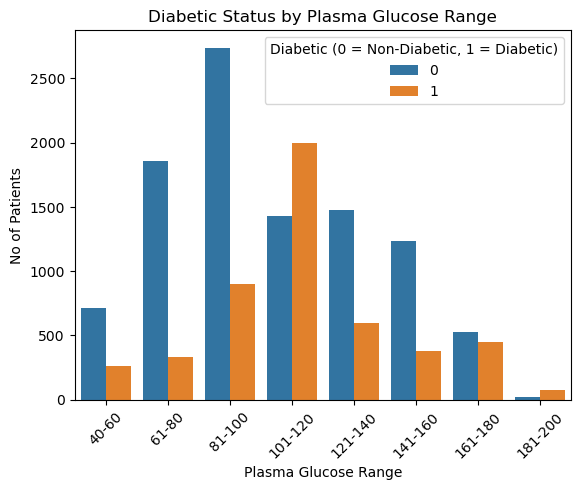

In [1041]:
# Create PlasmaGlucose bins
bins = [40, 60, 80, 100, 120, 140, 160, 180, 200]  # Define Plasma Glucose ranges
labels = ['40-60', '61-80', '81-100', '101-120', '121-140', '141-160', '161-180', '181-200']
df['RangeofPlasmaGlucose'] = pd.cut(df['PlasmaGlucose'], bins=bins, labels=labels)  # Use a new column

# Plot the count plot with hue
sns.countplot(data=df, x='RangeofPlasmaGlucose', hue='Diabetic')
plt.title('Diabetic Status by Plasma Glucose Range')
plt.xlabel('Plasma Glucose Range')
plt.ylabel('No of Patients')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Diabetic (0 = Non-Diabetic, 1 = Diabetic)')
plt.show()


# In the reearch paper they mentioned nothing about the conditions of test but on research this aligns with Fasting Plasma Glucose (FPG)
# Normal: 70–99 mg/dL (3.9–5.5 mmol/L)
# Prediabetes: 100–125 mg/dL (5.6–6.9 mmol/L)
# Diabetes: 126 mg/dL (7.0 mmol/L) or higher on two separate tests
# IM STILL NOT QUITE SURE WITH THIS INTERPRETATION


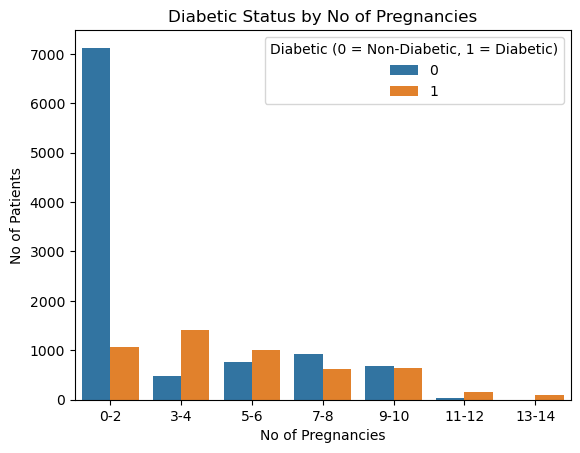

In [1043]:

# Create Pregnancies bins
bins = [0, 2, 4, 6, 8, 10, 12, 14]  # Define Pregnancies ranges
labels = ['0-2', '3-4', '5-6', '7-8', '9-10', '11-12', '13-14']
df['NoPregnancies'] = pd.cut(df['Pregnancies'], bins=bins, labels=labels, include_lowest=True)


# Plot the count plot with hue
sns.countplot(data=df, x='NoPregnancies', hue='Diabetic')
plt.title('Diabetic Status by No of Pregnancies')
plt.xlabel('No of Pregnancies')
plt.ylabel('No of Patients')
plt.legend(title='Diabetic (0 = Non-Diabetic, 1 = Diabetic)')
plt.show()


# The general trend seems to be that diabetes is directly proportional to the number of pregnancis 
# We are observing a positive correlation 

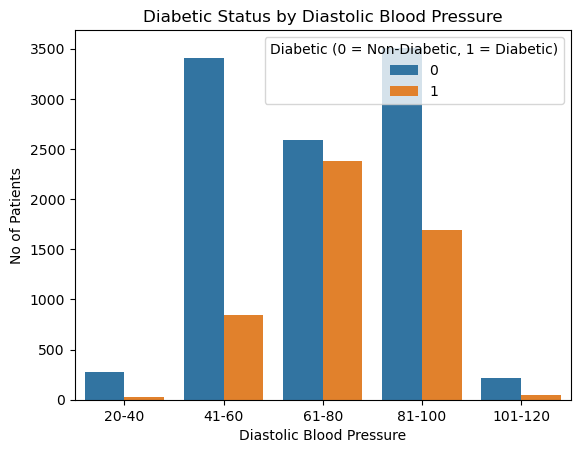

In [1045]:

# Create DiastolicBloodPressure bins
bins = [20, 40, 60, 80, 100, 120]  # Define DiastolicBloodPressure ranges
labels = ['20-40', '41-60', '61-80', '81-100', '101-120']
df['DiastolicBloodPressure'] = pd.cut(df['DiastolicBloodPressure'], bins=bins, labels=labels)

# Plot the count plot with hue
sns.countplot(data=df, x='DiastolicBloodPressure', hue='Diabetic')
plt.title('Diabetic Status by Diastolic Blood Pressure')
plt.xlabel('Diastolic Blood Pressure')
plt.ylabel('No of Patients')
plt.legend(title='Diabetic (0 = Non-Diabetic, 1 = Diabetic)')
plt.show()


# no patterns observed here as we see less diabetes cases in the 80+ range 

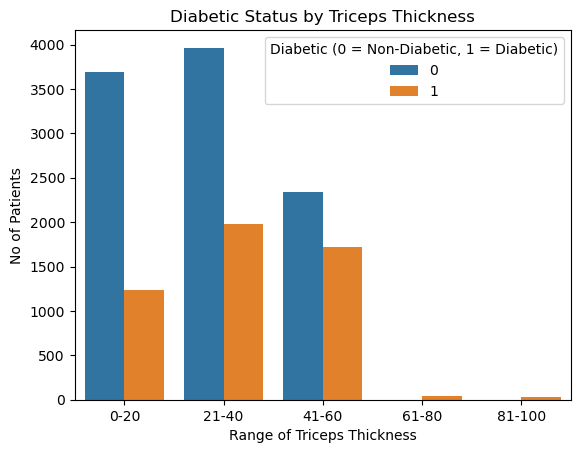

In [1047]:
# Create TricepsThickness bins
bins = [0, 20, 40, 60, 80, 100]  # Define DiastolicBloodPressure ranges
labels = ['0-20', '21-40', '41-60', '61-80', '81-100']
df['TricepsThickness'] = pd.cut(df['TricepsThickness'], bins=bins, labels=labels)

# Plot the count plot with hue
sns.countplot(data=df, x='TricepsThickness', hue='Diabetic')
plt.title('Diabetic Status by Triceps Thickness')
plt.xlabel('Range of Triceps Thickness')
plt.ylabel('No of Patients')
plt.legend(title='Diabetic (0 = Non-Diabetic, 1 = Diabetic)')
plt.show()


# triceps thickness is directly proportional to the diabetic status
# this suggests a very strong correlation

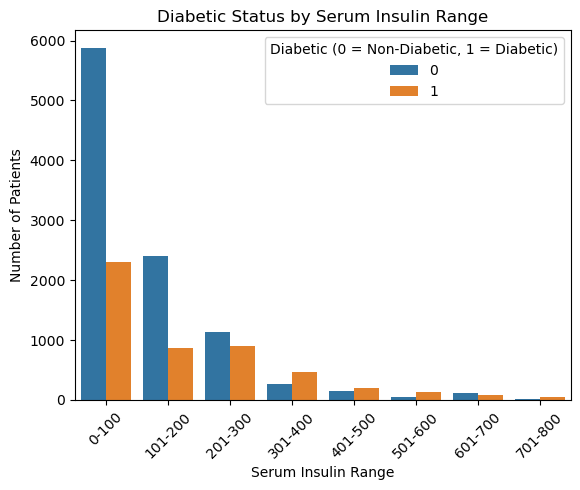

In [1049]:
bins = [0, 100, 200, 300, 400, 500, 600, 700, 800]
labels = ['0-100', '101-200', '201-300', '301-400', '401-500', '501-600', '601-700', '701-800']
df['SerumInsulinRange'] = pd.cut(df['SerumInsulin'], bins=bins, labels=labels)
sns.countplot(data=df, x='SerumInsulinRange', hue='Diabetic')
plt.title('Diabetic Status by Serum Insulin Range')
plt.xlabel('Serum Insulin Range')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)
plt.legend(title='Diabetic (0 = Non-Diabetic, 1 = Diabetic)')
plt.show()


# the range of data for the serum insulin was 14 - 799 
# there could be a possibility of outliers
# the serum insulin range is directly proportional to diabetes

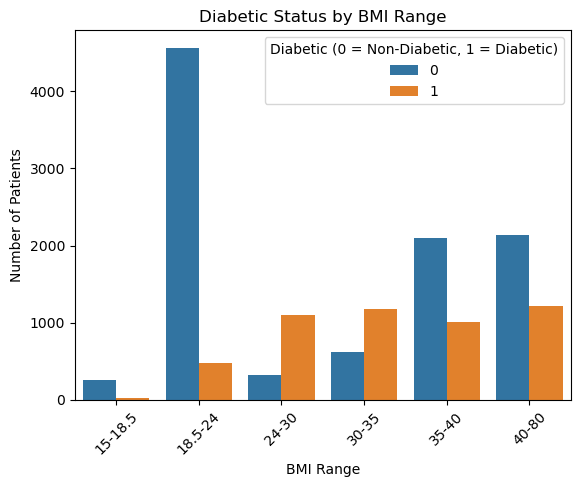

In [1051]:
# Define BMI bins and labels
bins = [15, 18.5,24,30,35,40,80]  # Adjust bins as needed
labels = ['15-18.5','18.5-24','24-30','30-35','35-40','40-80']
df['BMIRange'] = pd.cut(df['BMI'], bins=bins, labels=labels)

# Plot the count plot with hue
sns.countplot(data=df, x='BMIRange', hue='Diabetic')
plt.title('Diabetic Status by BMI Range')
plt.xlabel('BMI Range')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)
plt.legend(title='Diabetic (0 = Non-Diabetic, 1 = Diabetic)')
plt.show()


# generally the trend is that as BMI increases so does the proportion of diabetes clients with just an exception in the 41-45 range

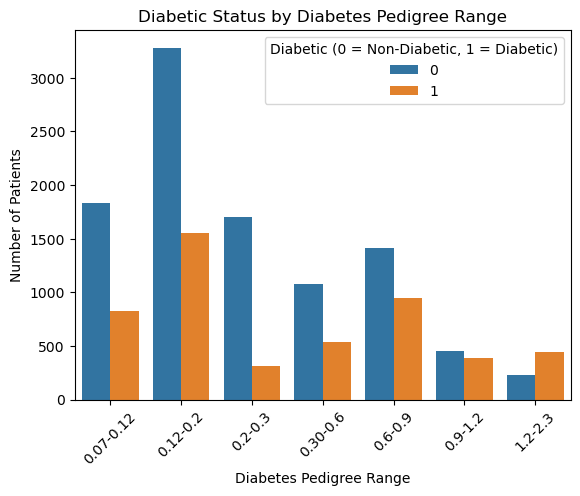

In [1053]:
# Define bins and labels for DiabetesPedigree
bins = [0.07,0.12, 0.2,0.3, 0.6, 0.9,1.2, 2.4]  # Adjust as needed
labels = ['0.07-0.12', '0.12-0.2','0.2-0.3', '0.30-0.6', '0.6-0.9', '0.9-1.2','1.2-2.3']
df['DiabetesPedigreeRange'] = pd.cut(df['DiabetesPedigree'], bins=bins, labels=labels)

# Plot the count plot with hue
sns.countplot(data=df, x='DiabetesPedigreeRange', hue='Diabetic')
plt.title('Diabetic Status by Diabetes Pedigree Range')
plt.xlabel('Diabetes Pedigree Range')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)
plt.legend(title='Diabetic (0 = Non-Diabetic, 1 = Diabetic)')
plt.show()


# the proportion of being daibetic increases as the diabetes pedigree range increases
# the exceptions is for the higher ranges but it could be due to unavailability of data in those age groups

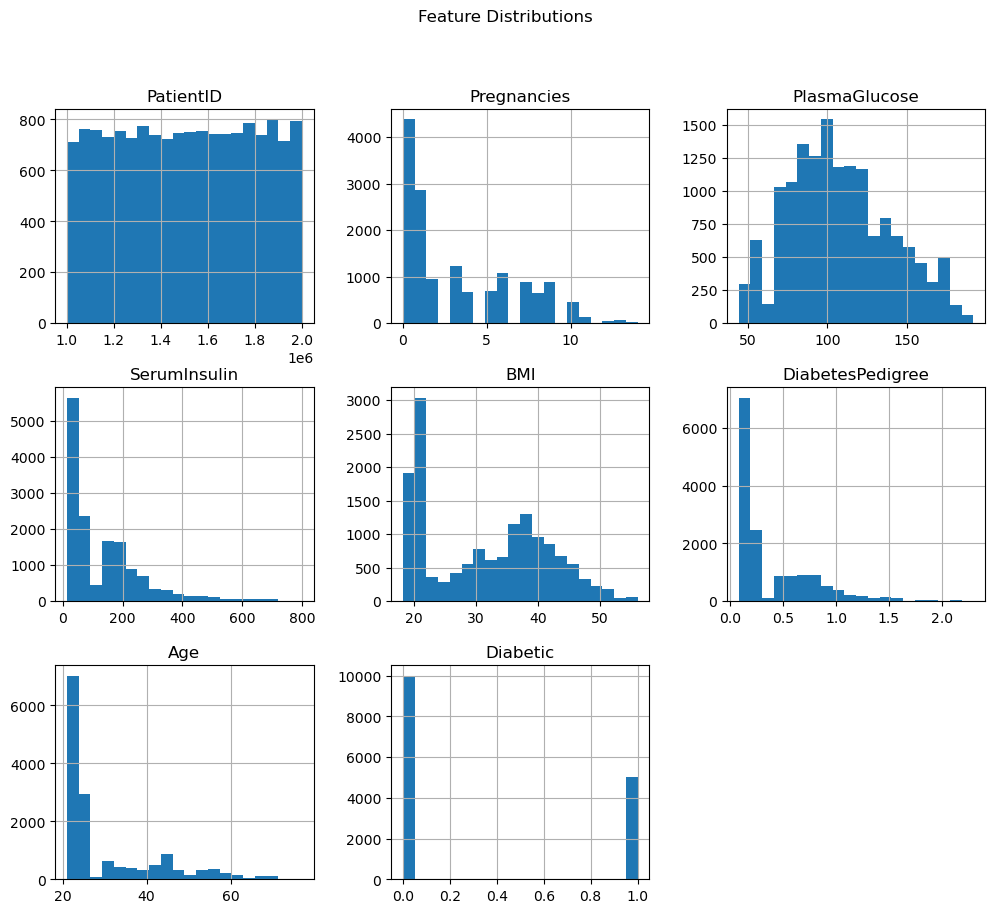

In [1055]:
# Histogram for all features
df.hist(bins=20, figsize=(12, 10))
plt.suptitle('Feature Distributions')
plt.show()


In [1056]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation of all numeric features with 'Diabetic'
diabetic_correlation = numeric_df.corr()['Diabetic'].sort_values(ascending=False)
print(diabetic_correlation)


Diabetic            1.000000
Pregnancies         0.407315
Age                 0.342605
SerumInsulin        0.247375
BMI                 0.210508
DiabetesPedigree    0.170302
PlasmaGlucose       0.128004
PatientID          -0.012494
Name: Diabetic, dtype: float64


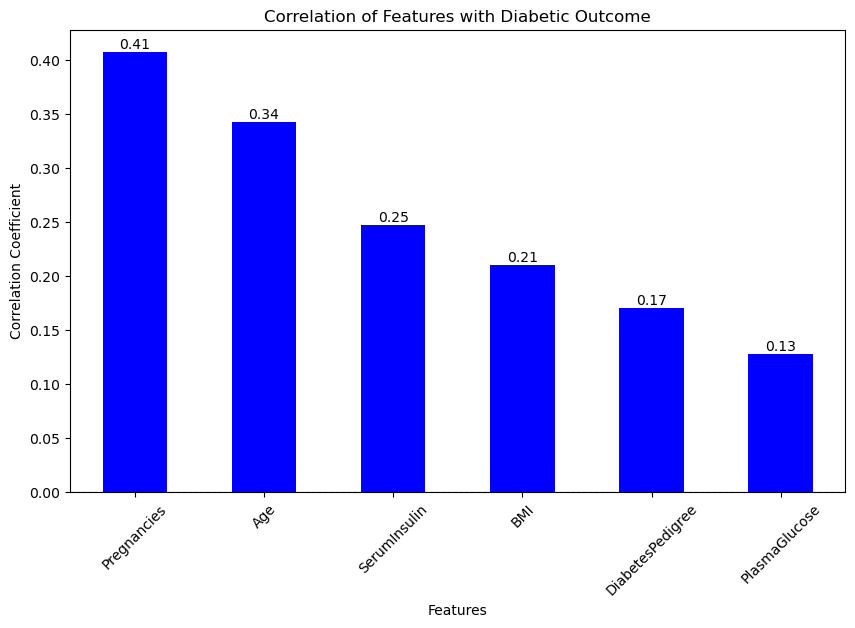

In [1057]:
# Remove 'PatientID' and 'Diabetic' from correlation results
if 'PatientID' in diabetic_correlation.index:
    diabetic_correlation = diabetic_correlation.drop(['PatientID'])
if 'Diabetic' in diabetic_correlation.index:
    diabetic_correlation = diabetic_correlation.drop(['Diabetic'])

# Plot the correlation values as a bar plot
fig, ax = plt.subplots(figsize=(10, 6))
bars = diabetic_correlation.plot(kind='bar', color='blue', ax=ax)

# Add correlation values on top of the bars
for bar in ax.patches:
    ax.annotate(
        f"{bar.get_height():.2f}",  # Format the value to 2 decimal places
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),  # Position the text
        ha='center', va='bottom', fontsize=10, color='black'
    )

# Add labels and titles
plt.title('Correlation of Features with Diabetic Outcome')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.xticks(rotation=45)
plt.show()


In [1058]:
# Drop the 'PatientID' column from the DataFrame
df = df.drop(columns=['PatientID'])


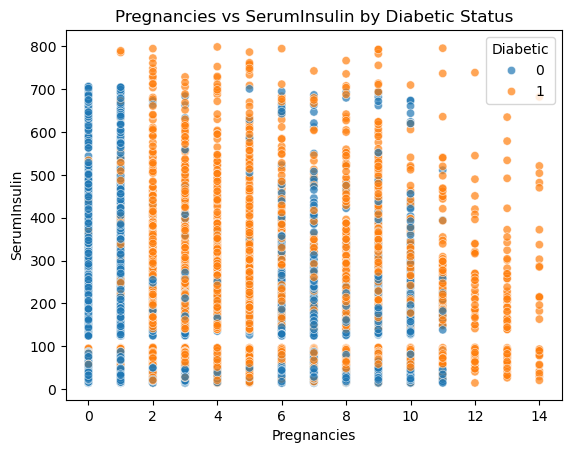

In [1059]:
sns.scatterplot(data=df, x='Pregnancies', y='SerumInsulin', hue='Diabetic', alpha=0.7)
plt.title('Pregnancies vs SerumInsulin by Diabetic Status')
plt.show()


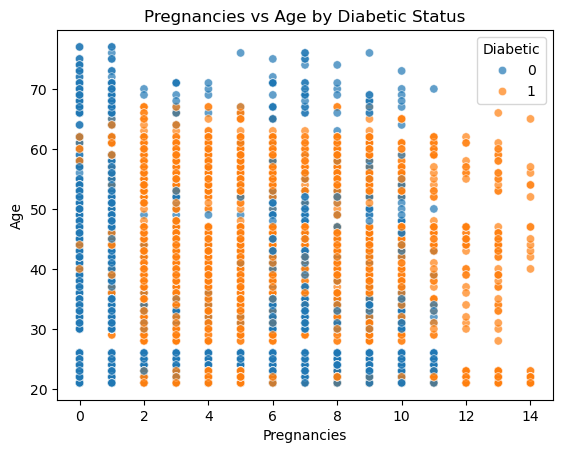

In [1060]:
sns.scatterplot(data=df, x='Pregnancies', y='Age', hue='Diabetic', alpha=0.7)
plt.title('Pregnancies vs Age by Diabetic Status')
plt.show()


In [1061]:
age_group_mapping = {'20-40': 0, '41-60': 1, '61-80': 2}
plasma_glucose_mapping = {'40-60': 0, '61-80': 1, '81-100': 2, '101-120': 3, '121-140': 4, '141-160': 5, '161-180': 6, '181-200': 7}
no_pregnancies_mapping = {'0-2': 0, '3-4': 1, '5-6': 2, '7-8': 3, '9-10': 4, '11-12': 5, '13-14': 6}
serum_insulin_mapping = {'0-100': 0, '101-200': 1, '201-300': 2, '301-400': 3, '401-500': 4, '501-600': 5, '601-700': 6, '701-800': 7}
bmi_range = {'15-18.5':0,'18.5-24':1,'24-30':2,'30-35':3,'35-40':4,'40-80':5}
dia_ped = {'0.07-0.12':0, '0.12-0.2':1,'0.2-0.3':2, '0.30-0.6':3, '0.6-0.9':4, '0.9-1.2':5,'1.2-2.3':6}
dia_blood_pres={'20-40':0, '41-60':1, '61-80':2, '81-100':3, '101-120':4}
tri_thick={'0-20':0, '21-40':1, '41-60':2, '61-80':3, '81-100':4}

# Apply encoding
df['AgeGroup'] = df['AgeGroup'].map(age_group_mapping).astype(int)
df['RangeofPlasmaGlucose'] = df['RangeofPlasmaGlucose'].map(plasma_glucose_mapping).astype(int)
df['NoPregnancies'] = df['NoPregnancies'].map(no_pregnancies_mapping).astype(int)
df['SerumInsulinRange'] = df['SerumInsulinRange'].map(serum_insulin_mapping).astype(int)
df['BMIRange'] = df['BMIRange'].map(bmi_range).astype(int)
df['DiabetesPedigreeRange']= df['DiabetesPedigreeRange'].map(dia_ped).astype(int)
df['DiastolicBloodPressure']= df['DiastolicBloodPressure'].map(dia_blood_pres).astype(int)
df['TricepsThickness'] = df['TricepsThickness'].map(tri_thick).astype(int)

In [1062]:
df = df.drop(columns=['Pregnancies', 'PlasmaGlucose', 'BMI', 'DiabetesPedigree', 'Age', 'SerumInsulin'])


In [1063]:
df.head()

,DiastolicBloodPressure,TricepsThickness,Diabetic,AgeGroup,RangeofPlasmaGlucose,NoPregnancies,SerumInsulinRange,BMIRange,DiabetesPedigreeRange
0,2,1,0,0,6,0,0,5,6
1,3,2,0,0,2,3,0,1,1
2,1,2,0,0,3,3,0,5,0
3,2,1,1,1,3,4,3,2,6
4,1,1,0,0,2,0,0,5,3


In [1064]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   DiastolicBloodPressure  15000 non-null  int32
 1   TricepsThickness        15000 non-null  int32
 2   Diabetic                15000 non-null  int64
 3   AgeGroup                15000 non-null  int32
 4   RangeofPlasmaGlucose    15000 non-null  int32
 5   NoPregnancies           15000 non-null  int32
 6   SerumInsulinRange       15000 non-null  int32
 7   BMIRange                15000 non-null  int32
 8   DiabetesPedigreeRange   15000 non-null  int32
dtypes: int32(8), int64(1)
memory usage: 586.1 KB


In [1065]:
df['DiastolicBloodPressure'].head()

0    2
1    3
2    1
3    2
4    1
Name: DiastolicBloodPressure, dtype: int32

In [1066]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix